In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('plant_disease_dataset.csv')

In [4]:
df

,temperature,humidity,rainfall,soil_pH,disease_present
0,27.483571,33.215053,0.572758,4.975875,1
1,24.308678,36.945005,42.522346,8.165266,0
2,28.238443,34.026189,16.095303,6.316734,1
3,32.615149,41.104180,20.311015,6.164949,0
4,23.829233,51.971785,11.851323,8.482468,0
...,...,...,...,...,...
9995,31.505510,81.939137,22.406822,5.862952,1
9996,15.008275,86.886833,10.503881,4.070539,0
9997,21.473416,81.891770,13.426869,7.101583,0
9998,27.478828,88.567649,9.719659,7.732620,0


In [5]:
df.describe()

,temperature,humidity,rainfall,soil_pH,disease_present
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,25.612191,62.119300,9.807522,6.245855,0.241000
std,5.813841,22.679977,9.852130,1.302465,0.427712
min,5.387999,6.244209,0.000055,4.000075,0.000000
25%,21.815610,40.772925,2.812822,5.122970,0.000000
50%,25.293238,72.211752,6.864898,6.232188,0.000000
75%,28.916048,81.032999,13.442871,7.386377,0.000000
max,56.686495,102.395421,84.654161,8.499875,1.000000


In [6]:
df.isnull().sum()

temperature        0
humidity           0
rainfall           0
soil_pH            0
disease_present    0
dtype: int64

In [7]:
df.shape

(10000, 5)

In [8]:
df.dtypes

temperature        float64
humidity           float64
rainfall           float64
soil_pH            float64
disease_present      int64
dtype: object

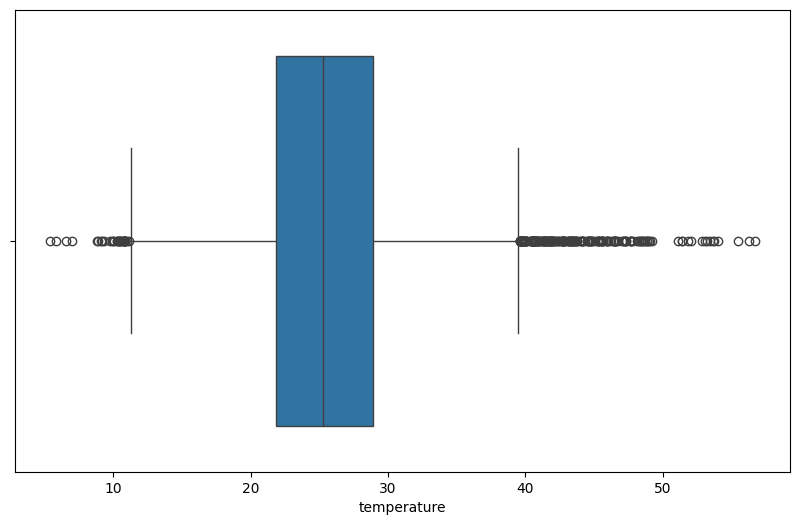

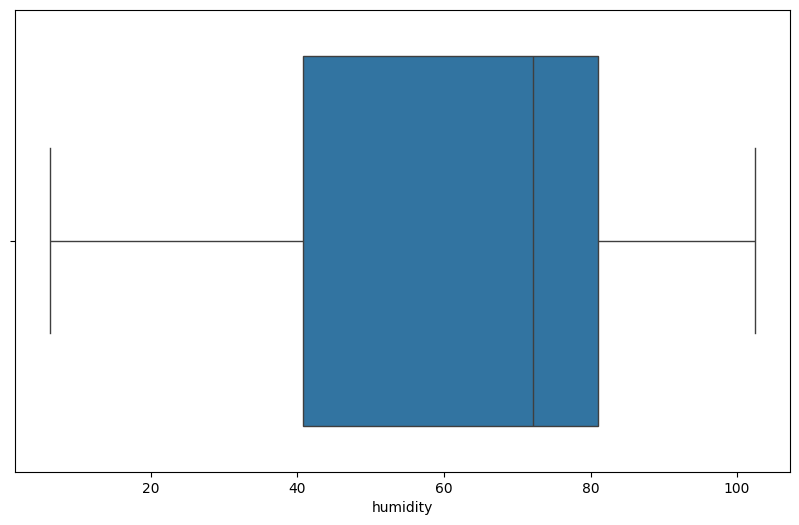

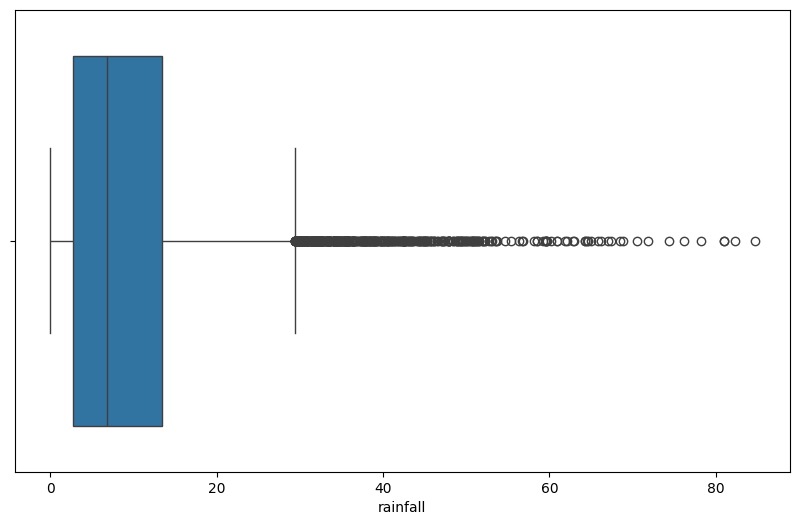

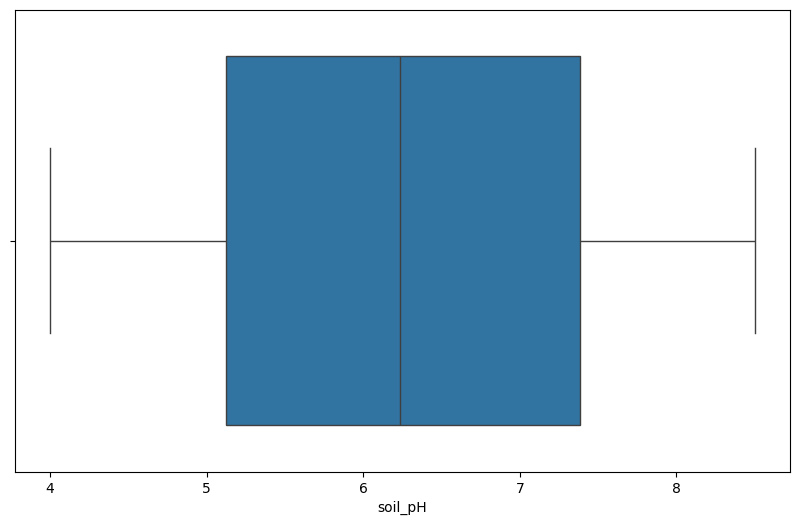

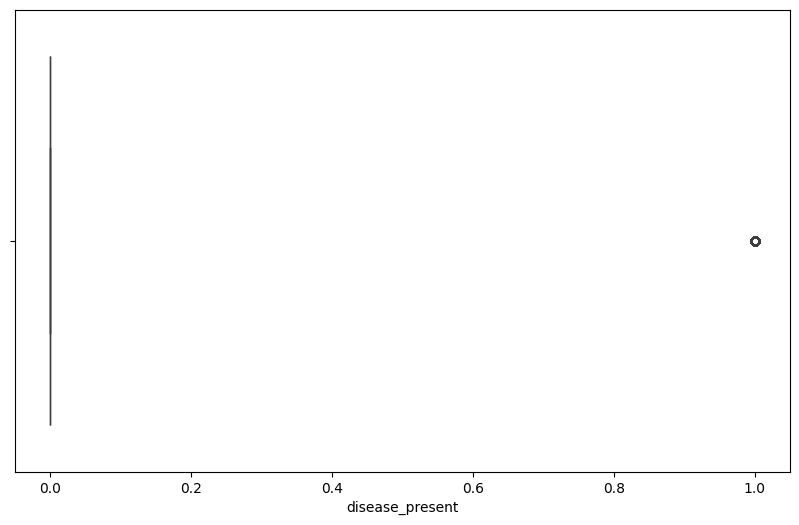

In [9]:
col = df.columns

for c in col:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=c,data=df)

In [10]:
df_corr = df.corr()
df_corr

,temperature,humidity,rainfall,soil_pH,disease_present
temperature,1.000000,-0.010136,-0.018284,-0.016792,-0.000869
humidity,-0.010136,1.000000,0.011850,0.008483,0.199241
rainfall,-0.018284,0.011850,1.000000,0.006270,0.218602
soil_pH,-0.016792,0.008483,0.006270,1.000000,-0.074088
disease_present,-0.000869,0.199241,0.218602,-0.074088,1.000000


<Axes: >

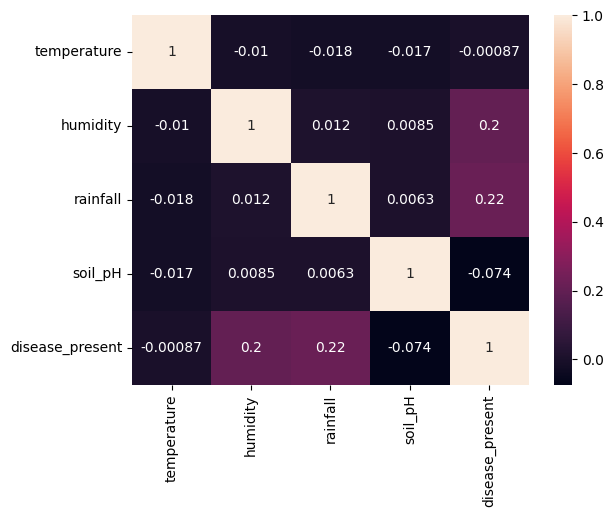

In [11]:
sns.heatmap(df_corr,annot=True)

In [12]:
X = df.drop('disease_present',axis=1)
y = df['disease_present']

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [30]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'gini', max_depth=10 , min_samples_split=10)

In [31]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=10)

In [32]:
y_pred = model.predict(X_test)

In [33]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(3000,))

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
score = accuracy_score(y_test,y_pred)
# Hyper parameter tunning

matrix = confusion_matrix(y_test,y_pred)
print('The Accuracy is ',score)
print('The Matrix is ',matrix)
matrix

The Accuracy is  0.8556666666666667
The Matrix is  [[2164  135]
 [ 298  403]]


array([[2164,  135],
       [ 298,  403]])

In [35]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [3,5,10,None],
    'min_samples_split' : [2,5,10],
    'criterion' : ['gini','entropy']
}

grid = GridSearchCV(DecisionTreeClassifier(),param_grid=params,cv=2)
grid.fit(X_train,y_train)

print(grid.best_params_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 10}


In [37]:
import pickle
with open('Plant_Disease_Model.pkl','wb') as f:
    pickle.dump(model,f)